# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

# Описание данных users_behavior.csv

* сalls — количество звонков,
* minutes — суммарная длительность звонков в минутах,
* messages — количество sms-сообщений,
* mb_used — израсходованный интернет-трафик в Мб,
* is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

# Содержание:

[**1. Откройте и изучите файл**](#Откройте-и-изучите-файл)

Путь к файлу: /datasets/users_behavior.csv. Скачать датасет
* [Импортируем библиотеки](#section_1_1)
* [Изучаем датасет](#section_1_2)
* [Ищем пустые значения](#section_1_3)
* [Ищем дубликаты](#section_1_4)
* [Рассмотриваем признаки](#section_1_5)
    * [сalls](#section_1_5_1)
    * [minutes](#section_1_5_2)
    * [messages](#section_1_5_3)
    * [mb_used](#section_1_5_4)
    * [is_ultra](#section_1_5_5)

[**2. Разбейте данные на выборки**](#Разбейте-данные-на-выборки)

[**3. Исследуйте модели**](#Исследуйте-модели)

* [дерево решений ](#section_3_1)
* [случайный лес](#section_3_2)
* [логистическая регрессия](#section_3_3)

[**4. Проверьте модель на тестовой выборке**](#Проверьте-модель-на-тестовой-выборке)

[**5. (бонус) Проверьте модели на адекватность**](#(бонус)-Проверьте-модели-на-адекватность)

[**6. Выводы**](#Выводы)

[**7. Чек-лист готовности проекта**](#Чек-лист-готовности-проекта)

## Откройте и изучите файл

<a id='section_1_1'></a>
### Импортируем библиотеки

In [1]:
pip install -U seaborn

Note: you may need to restart the kernel to use updated packages.


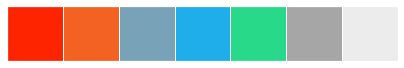

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set()

colors = ['#ff2400', '#f36223', '#78a2b7', '#1faee9', '#27d989', '#a6a6a6', '#ececec']
sns.palplot(sns.color_palette(colors))

<a id='section_1_2'></a>
### Изучаем датасет

In [3]:
data = pd.read_csv('/datasets/users_behavior.csv')
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
data.shape

(3214, 5)

В нашем датасете анонимизированные данные, отражающие количество совершенных абонентом звонков, отправленных сообщений и потребленного трафика, при этом мы знаем каким из двух целевых тарифов они пользовались.
    
Звонки и отправленные сообщения по какой-то причине во `float` - это необходимо исправить в дальнейшем.
    
Данные на первый взгляд полные, без пропусков.
    
Теоретически мы могли бы заморочиться и разбмть `is_ultra` на два признака - ультра и смарт, чтобы расширить нашу матрицу для алгоритмов машинного обучения.

<a id='section_1_3'></a>
### Ищем пустые значения

In [6]:
data.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

<a id='section_1_4'></a>
### Ищем дубликаты

In [7]:
data.duplicated().sum()

0

<a id='section_1_5'></a>
### Рассматриваем признаки

Рассмотрим каждый признак внимательно.

<a id='section_1_5_1'></a>
#### calls

In [8]:
data['calls'].unique()

array([ 40.,  85.,  77., 106.,  66.,  58.,  57.,  15.,   7.,  90.,  82.,
        45.,  51.,  56., 108.,   6.,   2.,  26.,  79.,  49.,  93.,  48.,
        11.,  53.,  81., 154.,  37.,  50.,  41.,  10.,  71.,  65., 110.,
       120.,  76.,  64.,  23.,  34.,  98.,  35.,   5.,  70., 124., 129.,
        67.,   0.,  13.,  68.,  91., 121., 114., 125.,  80.,  33., 138.,
        84.,  78.,  69.,  63.,  72.,  73.,   1.,  43., 118.,  74.,  83.,
       141., 117.,  54., 101.,  29.,   3., 107.,  55.,  47., 158.,  87.,
        28.,  59.,  52.,  44.,  17., 111., 109.,  14.,  92.,  94.,  46.,
       133.,  75.,  38.,  60., 100.,  31.,  61.,  89.,  27., 196.,  24.,
        99.,  62., 162., 116., 123.,  18.,  21.,  12.,  86.,  32.,  95.,
        39.,  30.,  25.,  36.,  42., 113.,   9., 183., 156., 127.,  96.,
        16.,   4., 102.,  97.,  20., 104., 144.,  19., 132., 131., 136.,
        88., 115., 176., 160., 164., 169.,  22., 105., 152., 177., 161.,
       112.,   8., 126., 178., 103., 130., 198., 11

In [9]:
max(data['calls'].unique())

244.0

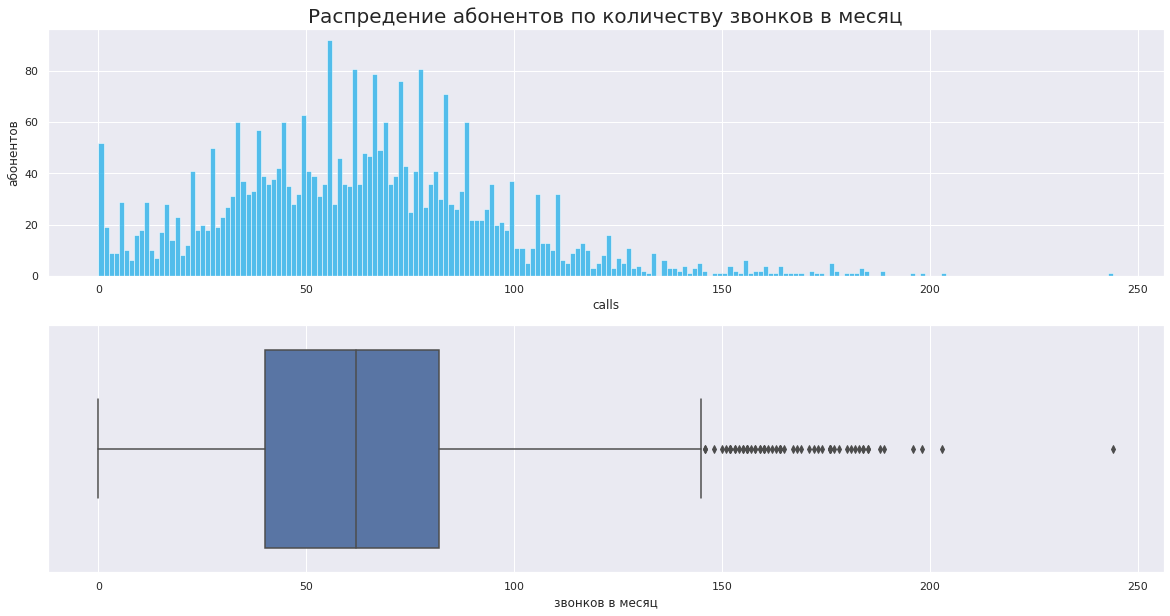

In [10]:
def hist_boxplot(data, bins, title, xtitle, ytitile, color):
    plt.figure(figsize=(20,10))
    plt.subplot(2,1,1)
    sns.histplot(data, bins=bins, color=color)
    plt.title(title, fontsize=20)
    plt.ylabel(ytitile);
    plt.subplot(2,1,2)
    sns.boxplot(x = data)
    plt.xlabel(xtitle)
    
hist_boxplot(data['calls'], 200, 'Распредение абонентов по количеству звонков в месяц', 'звонков в месяц', 'абонентов', colors[3])

In [11]:
data['calls'][(data['calls']>=0)&(data['calls']<11)].value_counts().sort_index()

0.0     40
1.0     12
2.0     19
3.0      9
4.0      9
5.0     15
6.0     14
7.0     10
8.0      6
9.0     16
10.0    18
Name: calls, dtype: int64

Изменим тип данных на int.

In [12]:
data.calls = data.calls.astype(int)

In [13]:
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40,311.90,83.0,19915.42,0
1,85,516.75,56.0,22696.96,0
2,77,467.66,86.0,21060.45,0
3,106,745.53,81.0,8437.39,1
4,66,418.74,1.0,14502.75,0


На графике мы видим, что наибольший интерес для нас представлят абоненты совершавшие от 0 до примерно 147 звонов, все что выше - выбросы.
    
В среднем абоненты совершали в районе 60 звонков в месяц.

<a id='section_1_5_2'></a>
#### minutes

In [14]:
data['minutes'].unique()

array([311.9 , 516.75, 467.66, ..., 634.44, 462.32, 566.09])

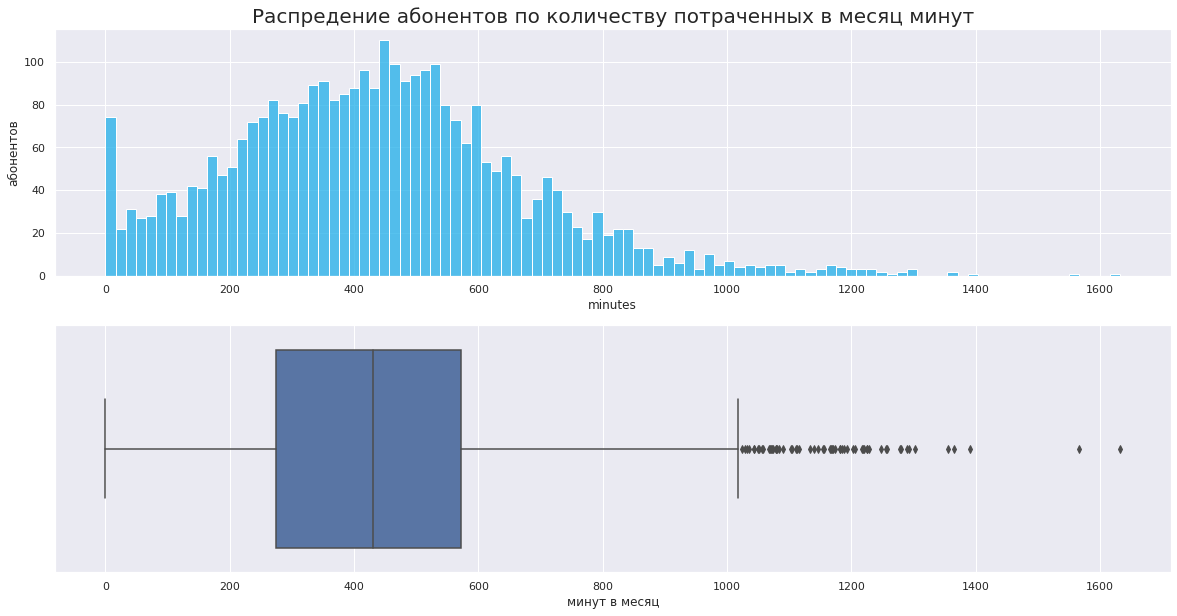

In [15]:
hist_boxplot(data['minutes'], 100, 'Распредение абонентов по количеству потраченных в месяц минут', 'минут в месяц', 'абонентов', colors[3])

На графике мы видим, что доверительный интервал от 0 до чуть более 1000 минут потраченного в месяц времени на разговоры.
    
В среднем абоненты проговорили в районе 420 минут в месяц.
    
Исходня из данных выше получается, что в среднем длительность звонка была в районе 7 минут.

In [16]:
data['minutes'][(data['minutes']>=0)&(data['minutes']<11)].value_counts().sort_index()

0.00     40
0.10      1
1.00      3
1.37      1
1.78      1
1.82      1
1.99      1
2.00      3
5.61      1
6.42      1
6.77      1
6.96      1
7.87      1
8.33      1
8.94      1
9.01      1
9.90      1
10.59     1
Name: minutes, dtype: int64

40 абонентов не использовали минуты. Посмотрим на поведение "молчунов".

In [17]:
data[data['minutes']==0]

,calls,minutes,messages,mb_used,is_ultra
54,0,0.0,33.0,14010.33,1
247,0,0.0,35.0,16444.99,1
264,0,0.0,21.0,19559.55,0
351,0,0.0,8.0,35525.61,1
390,0,0.0,25.0,19088.67,1
484,0,0.0,191.0,32448.02,1
551,0,0.0,24.0,18701.54,1
647,0,0.0,30.0,10236.20,1
769,0,0.0,32.0,17206.44,0
884,0,0.0,180.0,32045.73,1


Эти абоненты пользовались другими опциями своих тарифов.

<a id='section_1_5_3'></a>
#### messages

In [18]:
data['messages'].unique()

array([ 83.,  56.,  86.,  81.,   1.,  21.,  20.,   6.,   3.,  38.,  13.,
        61.,  16.,   0.,   4.,  90.,  31.,  97.,  66.,  19.,  30.,  52.,
        48.,  44.,  27.,   7.,   9.,  43.,  33.,  34.,  10., 106.,  65.,
        17.,  11.,  29.,  75.,  47.,  49.,  64., 144.,  99.,  46.,  24.,
        22.,  55.,   8.,  93., 153.,  37.,  69.,  18.,  78.,  42.,  82.,
        62.,  40.,  57.,  60.,  58., 123.,  26.,  51., 109.,   5.,  39.,
        35.,  79.,  12., 182.,  36., 126.,  59., 102.,  14., 133., 110.,
        54.,  72., 103.,  23., 108.,  92.,  73.,  15.,  25.,  91., 113.,
       105.,  85., 191.,  32.,  50., 145.,  41., 150.,  53., 171., 176.,
        68.,  28.,  76.,  71., 118.,  63., 132.,  84.,   2.,  67., 111.,
       101.,  96., 112.,  95.,  89., 143.,  45.,  70.,  77.,  94., 137.,
       107.,  98., 141., 124., 129., 114.,  87.,  80., 117., 138., 142.,
       134., 128., 180., 115., 154.,  74., 185., 121., 127., 116.,  88.,
       140., 201., 100., 169., 155., 135., 151., 13

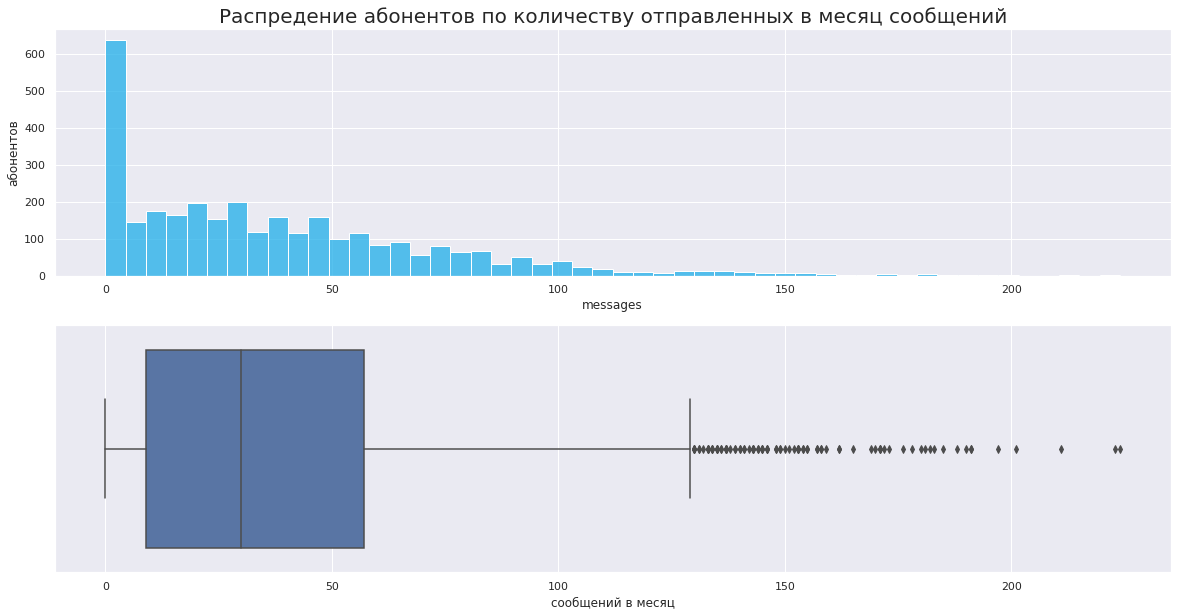

In [19]:
hist_boxplot(data['messages'], 50, 'Распредение абонентов по количеству отправленных в месяц сообщений', 'сообщений в месяц', 'абонентов', colors[3])

In [20]:
data['messages'][(data['messages']>=0)&(data['messages']<11)].value_counts().sort_index()

0.0     497
1.0      37
2.0      32
3.0      36
4.0      34
5.0      34
6.0      46
7.0      34
8.0      31
9.0      29
10.0     42
Name: messages, dtype: int64

Изменим тип данных на int.

In [21]:
data.messages = data.messages.astype(int)

In [22]:
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40,311.90,83,19915.42,0
1,85,516.75,56,22696.96,0
2,77,467.66,86,21060.45,0
3,106,745.53,81,8437.39,1
4,66,418.74,1,14502.75,0


На мой взгляд абоненты не пользующиеся смс не являются аномалией. Если бы у нас было больше данных, включая возраст и пол, мы бы скорее всего увидели четкую корреляцию по этим признакам.
    
Абоненты не использующие смс пользуются как сервисами в интернете, так и например вотсап, позволяющими отправлять сообщения, не сильно расходую на это интернет-трафик.

<a id='section_1_5_4'></a>
#### mb_used

In [23]:
data['mb_used'].unique()

array([19915.42, 22696.96, 21060.45, ..., 13974.06, 31239.78, 29480.52])

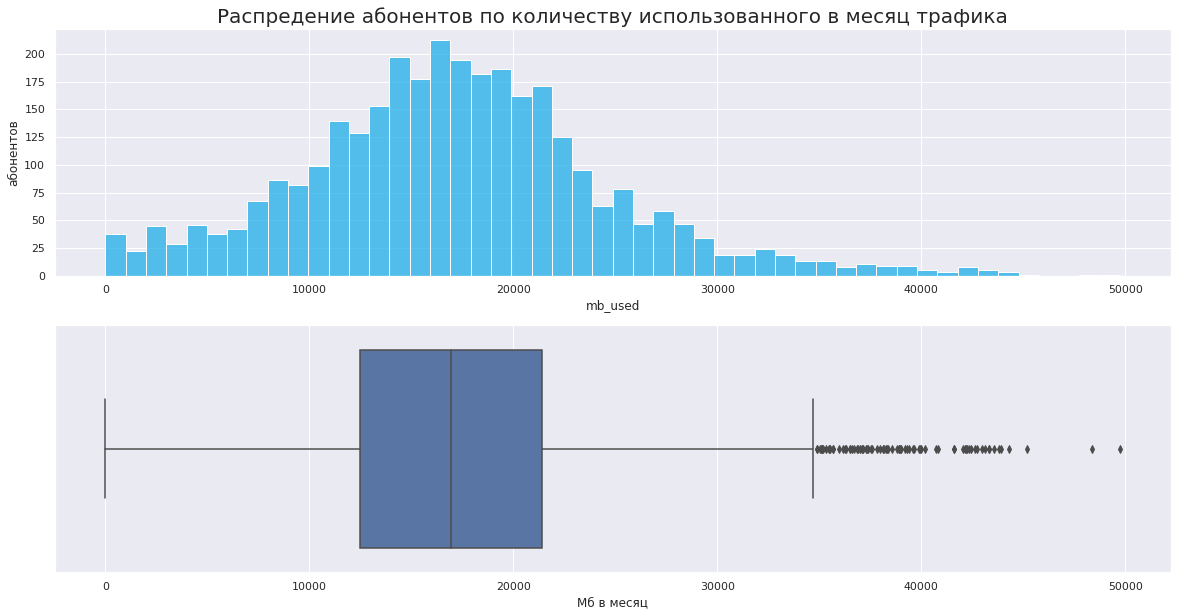

In [24]:
hist_boxplot(data['mb_used'], 50, 'Распредение абонентов по количеству использованного в месяц трафика', 'Мб в месяц', 'абонентов', colors[3])

In [25]:
max(data['mb_used'].unique())

49745.73000000001

Гистрограмма расхода трафика в целом похожа на нормальное распределение. Слева чуть большие значения в районе 0 - пенсионеры и параноики, справа выбросы тех, кто для серфинга в интернете использует исключительно смартфоны, видимо из-за отсутствия других девайсов с выходом в интернет - планшеты, ноутбуки, стационарные коспьютеры.
    
На что а месяц в среднем можно потратить в районе 17 Гб я даже предположить не могу. Может быть это какие-то мобильные игры или абоненты залипают в ютюб и тиктоке.

<a id='section_1_5_5'></a>
#### is_ultra

In [26]:
data['is_ultra'].unique()

array([0, 1])

In [27]:
data['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

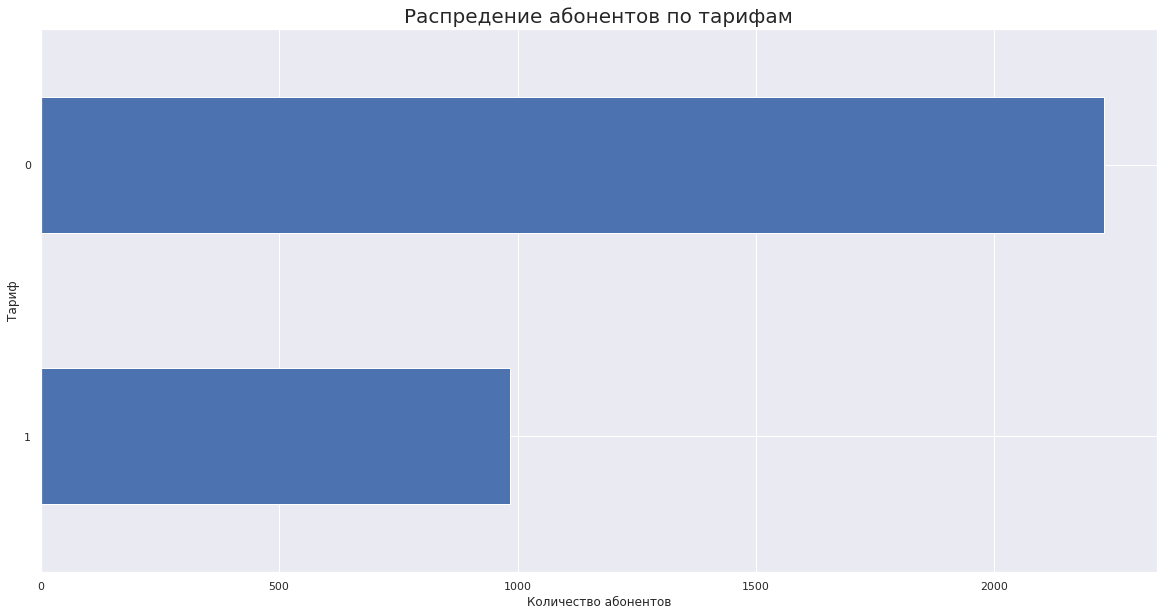

In [28]:
plt.figure(figsize=(20,10))
plt.title('Распредение абонентов по тарифам', fontsize=20)
plt.ylabel('Тариф')
plt.xlabel('Количество абонентов')
data['is_ultra'].value_counts().sort_values().plot(kind = 'barh');

Мы изучили датасет, в двух случаях поменяли тип данных на `int`. Увидели, что в представленном датасете наблюдается перекос в сторону любителей тарифа "Смарт". Если бы наш датасет был большего размера, можно было поработать с отбрасыванием выбросов. В нашем случае уменьшать датасет нецелесообразно.

Посмотрим на диаграмму рассеивания, чтобы понять, чем же у нас отличаются пользователи тарифов "Смарт" и "Ультра".

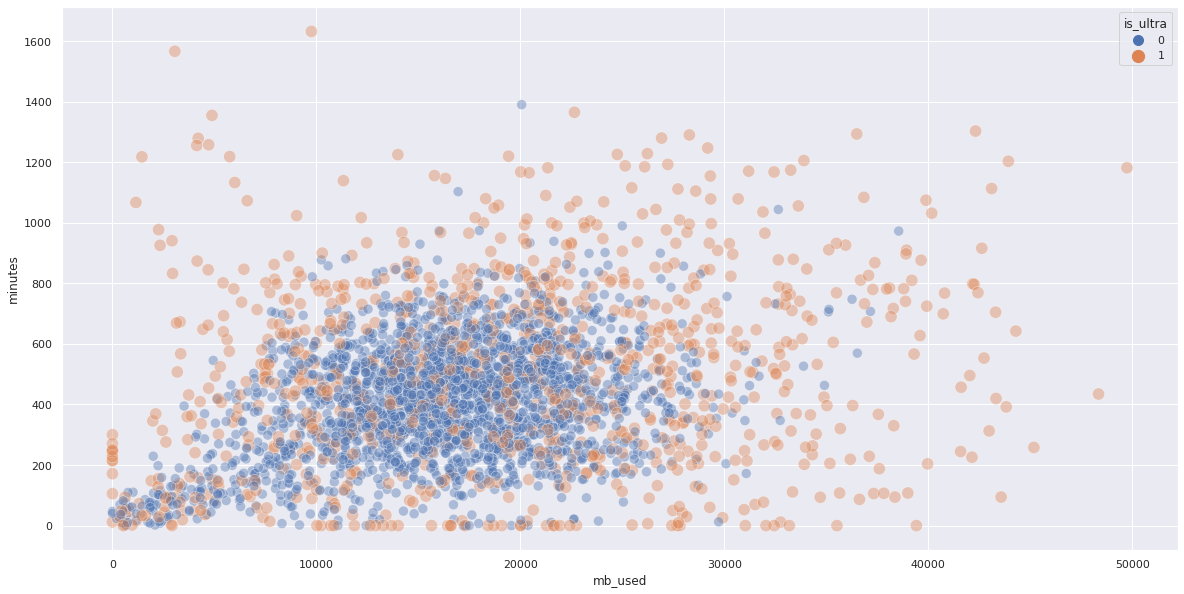

In [29]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = "mb_used", y = "minutes", data = data, color=colors[2], size = "is_ultra", hue='is_ultra', sizes = (150, 100), alpha = 0.4);

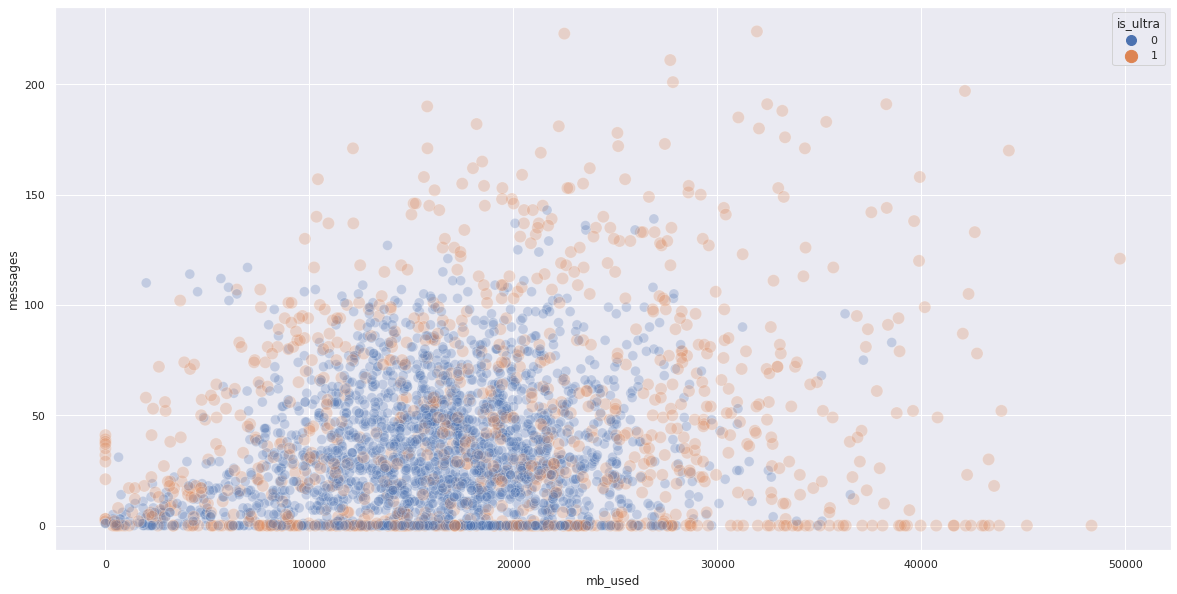

In [30]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = "mb_used", y = "messages", data = data, color=colors[2], size = "is_ultra", hue='is_ultra', sizes = (150, 100), alpha = 0.25);

Судя по графикам можно предположить, что тариф "Ультра" задумывался для абонентов, которые тратят много трафика, отправляют много смс и много разговаривают по телефону. Скорее всего он дороже тарифа "Смарт" и экономически целесоображен только при активном использовании услуг оператора.

Ориентируясь только на графики можно заключить, что в нашем датасете представлены и "умные", и "красивые". К "красивым" (эффект Веблена) относятся те, кто использует менее 25 Гб, 600 минут, 75 смс в месяц и пользуется тарифом "Ультра". К "умным" относятся те, кто потребляет более названных цифр, но остается на тарифе "Смарт" по привычке или инертности.

Данные умозаключения не имеют отношения к теме данного проекта и носят поверхностный характер, так как наш датасет содержит информацию только по одному месяцу - вернемся к задаче.

## Разбейте данные на выборки

Мы, конечно, сделаем разделение датасета на обучающую, валидационную и тестовую выборки, как это требует задание, но использовать ее пока не будем.

In [31]:
features = data.drop(['is_ultra'], axis=1)
target = data['is_ultra']
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=.36, random_state=345)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=345)

In [32]:
print('Размер обучающей выборки:', features_train.shape)
print('Размер валидационной выборки:', features_valid.shape)
print('Размер тестовой выборки:', features_test.shape)

Размер обучающей выборки: (2056, 4)
Размер валидационной выборки: (579, 4)
Размер тестовой выборки: (579, 4)


In [33]:
def make_charts(x, y1, y2, to_title):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title(f'Точность на валидационной выборке при {to_title}%', fontsize=15)
    sns.lineplot(x = x, y = y1, color=colors[3], sizes = (10, 300), alpha = 0.7)
    plt.subplot(1,2,2)
    plt.title(f'Точность на обучающей выборке при {to_title}%', fontsize=15)
    sns.lineplot(x = x, y = y2, color=colors[3], sizes = (10, 300), alpha = 0.7)

## Исследуйте модели

В процессе исследования моделей мы будем использовать три типа классификации:
* дерево решений;
* случайный лес;
* логистическая регрессия.

Безусловно, мы можем повлиять на обучение моделей, "подкручивая" гиперпараметры, но помимо этого мы можем "поиграться" с пропорциями разделения датасета на выборки.

<a id='section_3_1'></a>
### дерево решений

У дерева решений мы работаем с гиперпараметрами:
* max_depth;
* min_samples_leaf.

test_size=35%


100%|██████████| 15/15 [00:00<00:00, 92.75it/s]



    Accuracy лучшей модели дерева решений на валидационной выборке: 0.8220640569395018,
    max_depth: 9,
    min_samples_leaf: 6

    
-------------------------
test_size=36%


100%|██████████| 15/15 [00:00<00:00, 96.17it/s] 



    Accuracy лучшей модели дерева решений на валидационной выборке: 0.8203799654576857,
    max_depth: 7,
    min_samples_leaf: 1

    
-------------------------
test_size=37%


100%|██████████| 15/15 [00:00<00:00, 93.56it/s]



    Accuracy лучшей модели дерева решений на валидационной выборке: 0.8134453781512605,
    max_depth: 9,
    min_samples_leaf: 8

    
-------------------------
test_size=38%


100%|██████████| 15/15 [00:00<00:00, 91.04it/s] 



    Accuracy лучшей модели дерева решений на валидационной выборке: 0.7937806873977087,
    max_depth: 9,
    min_samples_leaf: 8

    
-------------------------
test_size=39%


100%|██████████| 15/15 [00:00<00:00, 96.32it/s] 



    Accuracy лучшей модели дерева решений на валидационной выборке: 0.7990430622009569,
    max_depth: 3,
    min_samples_leaf: 1

    
-------------------------
test_size=40%


100%|██████████| 15/15 [00:00<00:00, 57.88it/s]



    Accuracy лучшей модели дерева решений на валидационной выборке: 0.7962674961119751,
    max_depth: 9,
    min_samples_leaf: 6

    
-------------------------

Accuracy наилучшей модели дерева решений на валидационной выборке: 0.8220640569395018,
max_depth: 9,
min_samples_leaf: 6
при выделении на валидационную и тестувую выборки 35%



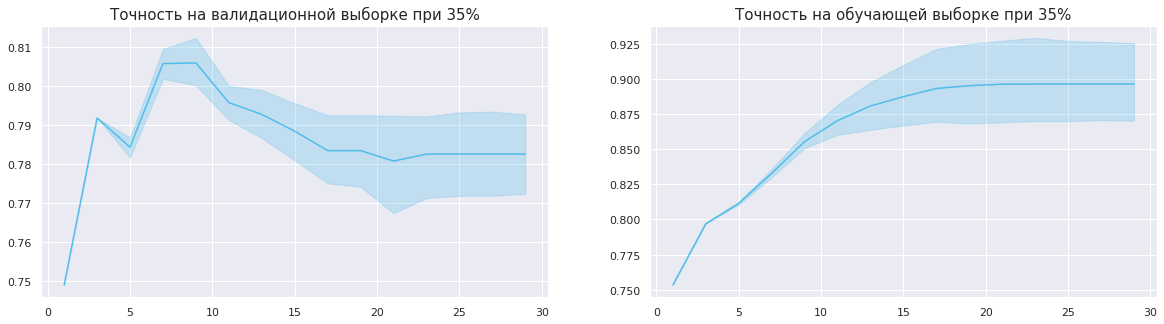

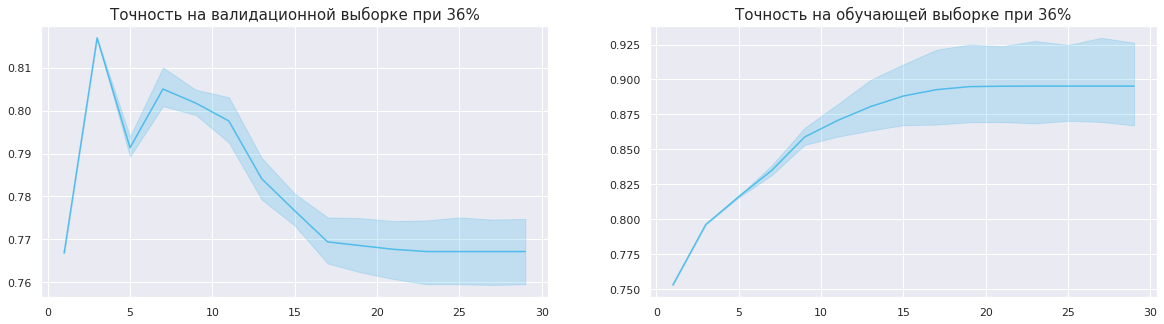

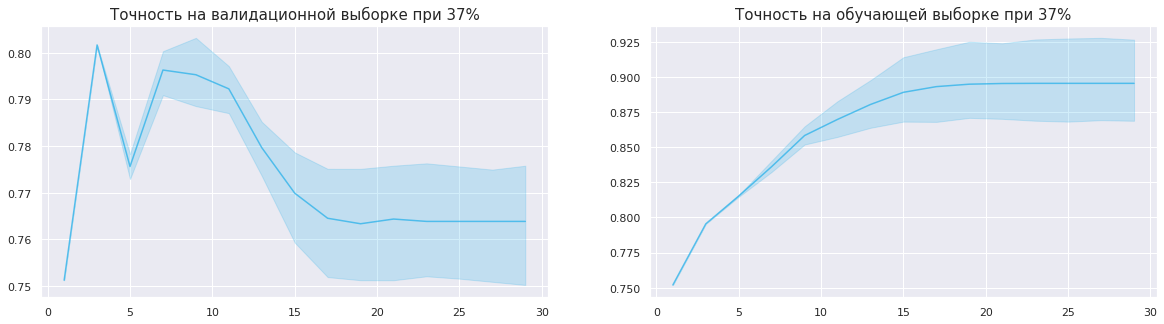

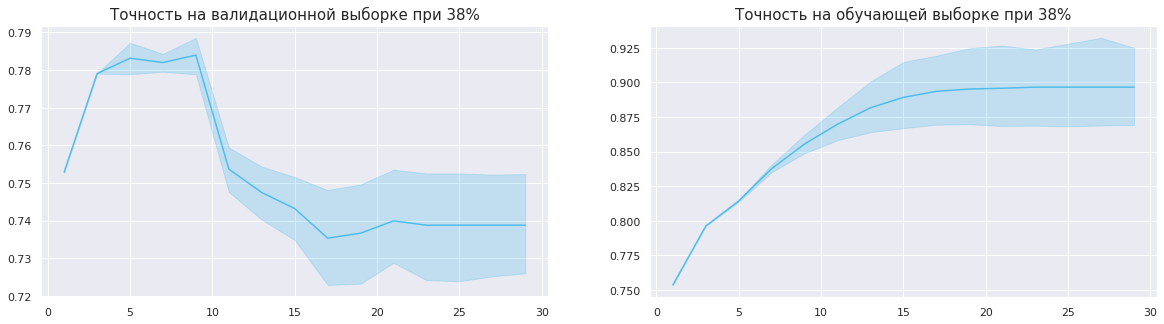

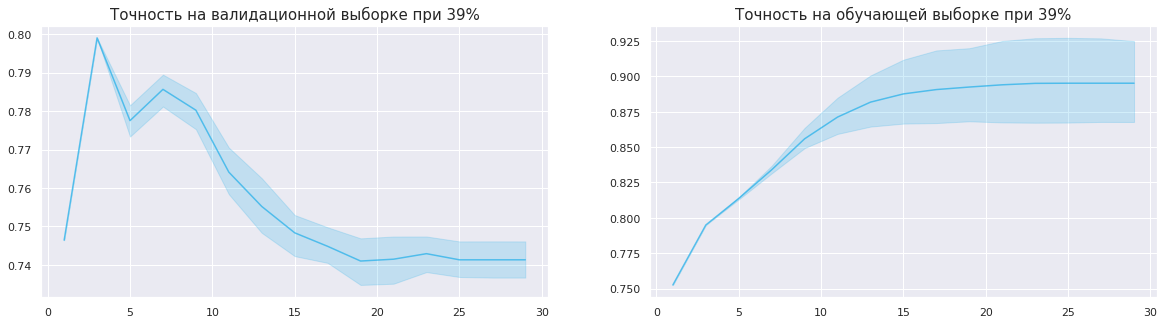

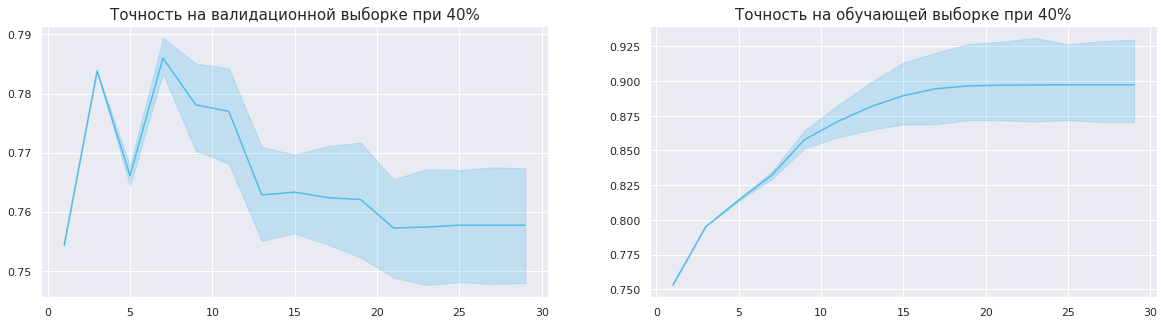

In [34]:
best_of_the_best_model_tree = None
best_of_the_best_result_tree = 0
best_of_the_best_depth_tree = 0
best_of_the_best_leaf_tree = 0
best_test_size = 0
    
for test_size in range(35, 41):
    print(f'test_size={test_size}%')
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=test_size/100, random_state=345, stratify=target)
    features_valid, features_test, target_valid, target_test = train_test_split(
        features_valid, target_valid, test_size=0.5, random_state=345, stratify=target_valid)

    best_model_tree = None
    best_result_tree = 0
    best_depth_tree = 0
    best_leaf_tree = 0

    list_depth_tree = []
    list_accuracy_valid_tree = []
    list_accuracy_train_tree = []

    for leaf in range(1, 11):
        for depth in tqdm(range(1, 31, 2)):
            model = DecisionTreeClassifier(max_depth=depth, random_state=345, min_samples_leaf=leaf)
            model.fit(features_train, target_train)
            predictions_valid = model.predict(features_valid)
            predictions_train = model.predict(features_train)
            result_valid = accuracy_score(target_valid, predictions_valid)
            result_train = accuracy_score(target_train, predictions_train)

            list_depth_tree.append(depth)
            list_accuracy_valid_tree.append(result_valid)
            list_accuracy_train_tree.append(result_train)
            if result_valid > best_result_tree:
                best_model_tree = model
                best_result_tree = result_valid
                best_depth_tree = depth
                best_leaf_tree = leaf

    make_charts(list_depth_tree, list_accuracy_valid_tree, list_accuracy_train_tree, test_size)

    print(f"""
    Accuracy лучшей модели дерева решений на валидационной выборке: {best_result_tree},
    max_depth: {best_depth_tree},
    min_samples_leaf: {best_leaf_tree}

    """)
    print('-'*25)
    if best_result_tree > best_of_the_best_result_tree:
        best_of_the_best_model_tree = best_model_tree
        best_of_the_best_result_tree = best_result_tree
        best_of_the_best_depth_tree = best_depth_tree
        best_of_the_best_leaf_tree = best_leaf_tree
        best_test_size = test_size
print(f"""
Accuracy наилучшей модели дерева решений на валидационной выборке: {best_of_the_best_result_tree},
max_depth: {best_of_the_best_depth_tree},
min_samples_leaf: {best_of_the_best_leaf_tree}
при выделении на валидационную и тестувую выборки {best_test_size}%
""")

In [35]:
print('best_of_the_best_model_tree:', best_of_the_best_model_tree)

best_of_the_best_model_tree: DecisionTreeClassifier(max_depth=9, min_samples_leaf=6, random_state=345)


Наилучший результат получили при выделении 35% датасета на валидационную и тестовую выборки, достигнув точности модели в 0.82.

<a id='section_3_2'></a>
### случайный лес

В "случайном лесу" мы работаем с:

* n_estimators;
* max_depth;
* min_samples_leaf.

test_size=36%


100%|██████████| 3/3 [00:06<00:00,  2.09s/it]



    Accuracy лучшей модели "случайный лес" на валидационной выборке: 0.8480138169257341,
    n_estimators: 26,
    max_depth: 9,
    min_samples_leaf: 2
    
-------------------------
test_size=37%


100%|██████████| 3/3 [00:06<00:00,  2.06s/it]



    Accuracy лучшей модели "случайный лес" на валидационной выборке: 0.8352941176470589,
    n_estimators: 28,
    max_depth: 9,
    min_samples_leaf: 1
    
-------------------------
test_size=38%


100%|██████████| 3/3 [00:06<00:00,  2.03s/it]



    Accuracy лучшей модели "случайный лес" на валидационной выборке: 0.8117839607201309,
    n_estimators: 27,
    max_depth: 9,
    min_samples_leaf: 3
    
-------------------------
test_size=39%


100%|██████████| 3/3 [00:06<00:00,  2.03s/it]



    Accuracy лучшей модели "случайный лес" на валидационной выборке: 0.8181818181818182,
    n_estimators: 29,
    max_depth: 10,
    min_samples_leaf: 1
    
-------------------------
test_size=40%


100%|██████████| 3/3 [00:06<00:00,  2.05s/it]



    Accuracy лучшей модели "случайный лес" на валидационной выборке: 0.8258164852255054,
    n_estimators: 26,
    max_depth: 9,
    min_samples_leaf: 1
    
-------------------------

Accuracy наилучшей модели "случайный лес" на валидационной выборке: 0.8480138169257341,
n_estimators: 26,
max_depth: 9,
min_samples_leaf: 2
при выделении на валидационную и тестувую выборки 36%



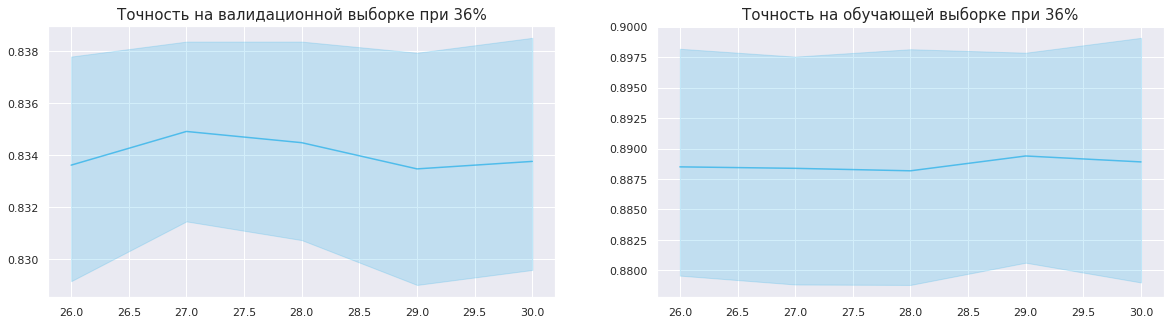

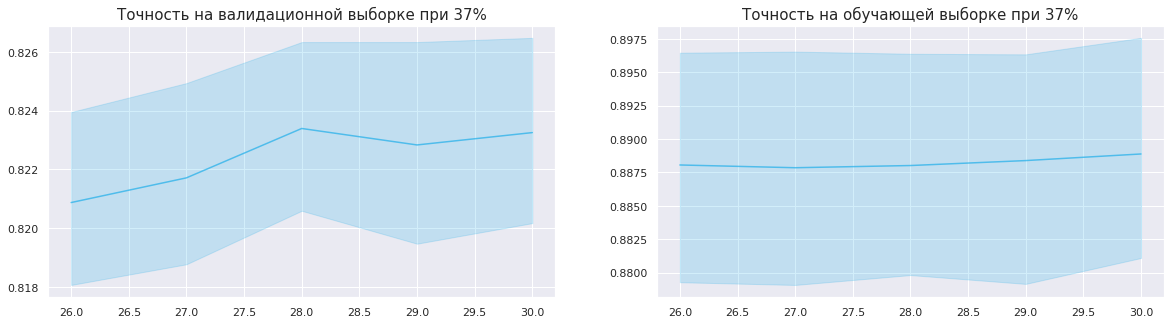

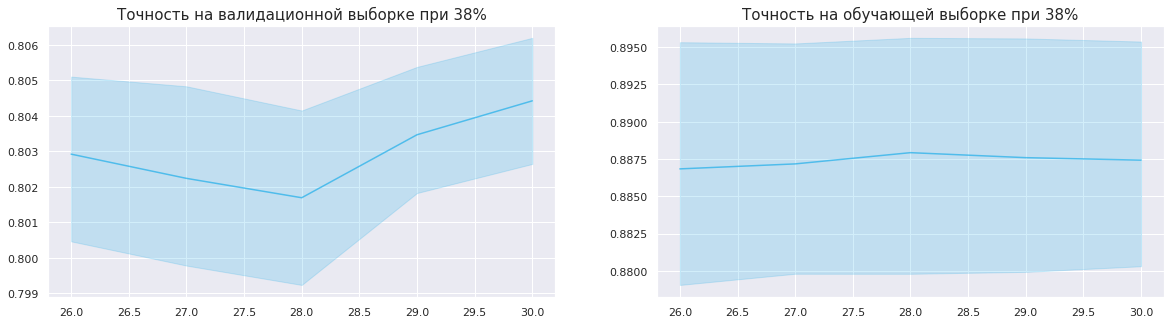

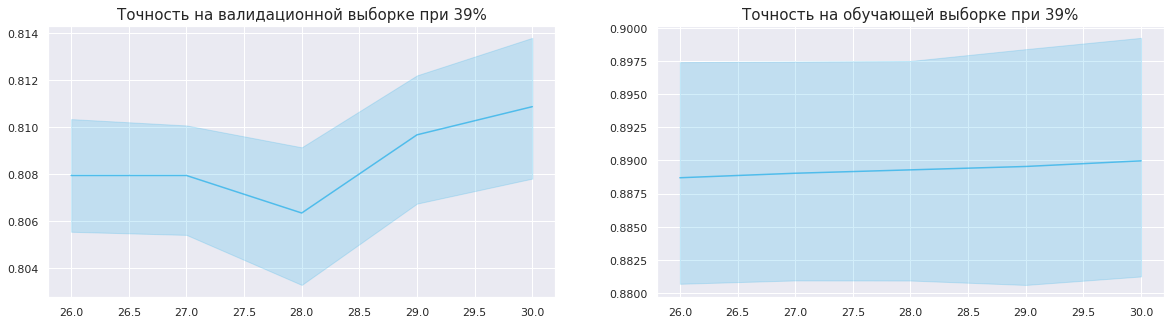

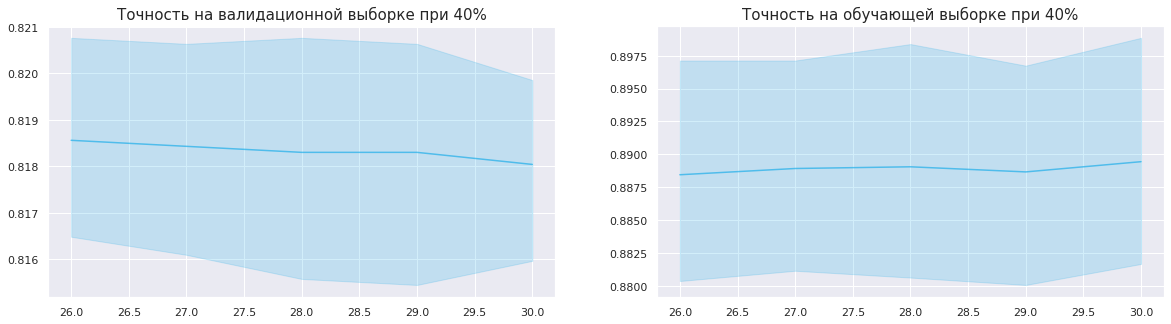

In [36]:
best_of_the_best_model_forest = None
best_of_the_best_result_forest = 0
best_of_the_best_estimator_forest = 0
best_of_the_best_depth_forest = 0
best_of_the_best_min_samples_leaf_forest = 0
best_test_size = 0
    
for test_size in range(36, 41):
    print(f'test_size={test_size}%')
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=test_size/100, random_state=345, stratify=target)
    features_valid, features_test, target_valid, target_test = train_test_split(
        features_valid, target_valid, test_size=0.5, random_state=345, stratify=target_valid)


    best_model_forest = None
    best_result_forest = 0
    best_estimator_forest = 0
    best_depth_forest = 0
    best_min_samples_leaf_forest = 0

    list_estimators_forest = []
    list_accuracy_valid_forest = []
    list_accuracy_train_forest = []

    for min_samples_leaf in tqdm(range(1, 4)):
        for estimator in range(26, 31):
            for depth in range (9, 13):
                model = RandomForestClassifier(
                    random_state=345, 
                    n_estimators=estimator, 
                    max_depth=depth, 
                    min_samples_leaf=min_samples_leaf
                )
                model.fit(features_train, target_train)
                predictions_valid = model.predict(features_valid)
                predictions_train = model.predict(features_train)
                result_valid = accuracy_score(target_valid, predictions_valid)
                result_train = accuracy_score(target_train, predictions_train)

                list_estimators_forest.append(estimator)
                list_accuracy_valid_forest.append(result_valid)
                list_accuracy_train_forest.append(result_train)
                if result_valid > best_result_forest:
                    best_model_forest = model
                    best_result_forest = result_valid
                    best_estimator_forest = estimator
                    best_depth_forest = depth
                    best_min_samples_leaf_forest = min_samples_leaf

    make_charts(list_estimators_forest, list_accuracy_valid_forest, list_accuracy_train_forest, test_size)

    print(f"""
    Accuracy лучшей модели "случайный лес" на валидационной выборке: {best_result_forest},
    n_estimators: {best_estimator_forest},
    max_depth: {best_depth_forest},
    min_samples_leaf: {best_min_samples_leaf_forest}
    """)
    print('-'*25)
    if best_result_forest > best_of_the_best_result_forest:
        best_of_the_best_model_forest = best_model_forest
        best_of_the_best_result_forest = best_result_forest
        best_of_the_best_estimator_forest = best_estimator_forest
        best_of_the_best_depth_forest = best_depth_forest
        best_of_the_best_min_samples_leaf_forest = best_min_samples_leaf_forest
        best_test_size = test_size
print(f"""
Accuracy наилучшей модели "случайный лес" на валидационной выборке: {best_of_the_best_result_forest},
n_estimators: {best_of_the_best_estimator_forest},
max_depth: {best_of_the_best_depth_forest},
min_samples_leaf: {best_of_the_best_min_samples_leaf_forest}
при выделении на валидационную и тестувую выборки {best_test_size}%
""")

In [37]:
print('best_of_the_best_model_forest', best_of_the_best_model_forest) #0.8480138169257341, #36%

best_of_the_best_model_forest RandomForestClassifier(max_depth=9, min_samples_leaf=2, n_estimators=26,
                       random_state=345)


Наилучший результат получили при выделении 36% датасета на валидационную и тестовую выборки, достигнув точности модели в 0.848.

<a id='section_3_3'></a>
### логистическая регрессия

Как мне показалось логистическая регрессия не очень гибка в настройках. Заметных изменений, влияющих на результат, удалось достичь работая с параметрами:
* С;
* solver.

test_size=35%


100%|██████████| 5/5 [00:00<00:00, 27.64it/s]



    Accuracy лучшей модели "логистическая регрессия" на валидационной выборке: 0.7491103202846975,
    solver: newton-cg,
    C: 1
    
-------------------------
test_size=36%


100%|██████████| 5/5 [00:00<00:00, 23.47it/s]



    Accuracy лучшей модели "логистическая регрессия" на валидационной выборке: 0.7426597582037997,
    solver: newton-cg,
    C: 1
    
-------------------------
test_size=37%


100%|██████████| 5/5 [00:00<00:00, 26.21it/s]



    Accuracy лучшей модели "логистическая регрессия" на валидационной выборке: 0.7563025210084033,
    solver: newton-cg,
    C: 1
    
-------------------------
test_size=38%


100%|██████████| 5/5 [00:00<00:00, 26.37it/s]



    Accuracy лучшей модели "логистическая регрессия" на валидационной выборке: 0.7381342062193126,
    solver: newton-cg,
    C: 1
    
-------------------------
test_size=39%


100%|██████████| 5/5 [00:00<00:00, 29.14it/s]



    Accuracy лучшей модели "логистическая регрессия" на валидационной выборке: 0.7464114832535885,
    solver: newton-cg,
    C: 1
    
-------------------------
test_size=40%


100%|██████████| 5/5 [00:00<00:00, 24.77it/s]



    Accuracy лучшей модели "логистическая регрессия" на валидационной выборке: 0.7402799377916018,
    solver: newton-cg,
    C: 1
    
-------------------------
test_size=41%


100%|██████████| 5/5 [00:00<00:00, 22.47it/s]



    Accuracy лучшей модели "логистическая регрессия" на валидационной выборке: 0.7572078907435509,
    solver: newton-cg,
    C: 1
    
-------------------------
test_size=42%


100%|██████████| 5/5 [00:00<00:00, 25.54it/s]



    Accuracy лучшей модели "логистическая регрессия" на валидационной выборке: 0.7570370370370371,
    solver: newton-cg,
    C: 1
    
-------------------------
test_size=43%


100%|██████████| 5/5 [00:00<00:00, 26.23it/s]



    Accuracy лучшей модели "логистическая регрессия" на валидационной выборке: 0.7409551374819102,
    solver: newton-cg,
    C: 1
    
-------------------------
test_size=44%


100%|██████████| 5/5 [00:00<00:00, 26.17it/s]



    Accuracy лучшей модели "логистическая регрессия" на валидационной выборке: 0.7496463932107497,
    solver: newton-cg,
    C: 1
    
-------------------------
test_size=45%


100%|██████████| 5/5 [00:00<00:00, 24.99it/s]



    Accuracy лучшей модели "логистическая регрессия" на валидационной выборке: 0.7690179806362379,
    solver: newton-cg,
    C: 1
    
-------------------------

Accuracy наилучшей модели "логистическая регрессия" на валидационной выборке: 0.7690179806362379,
solver: newton-cg,
C: 1
при выделении на валидационную и тестувую выборки 45%



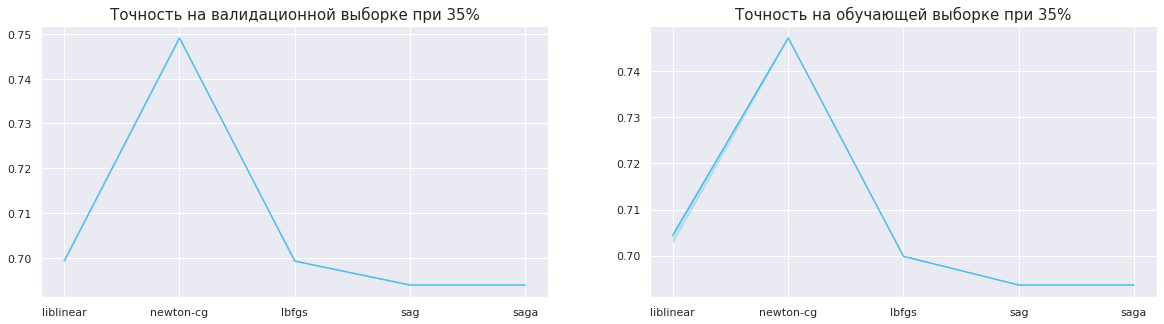

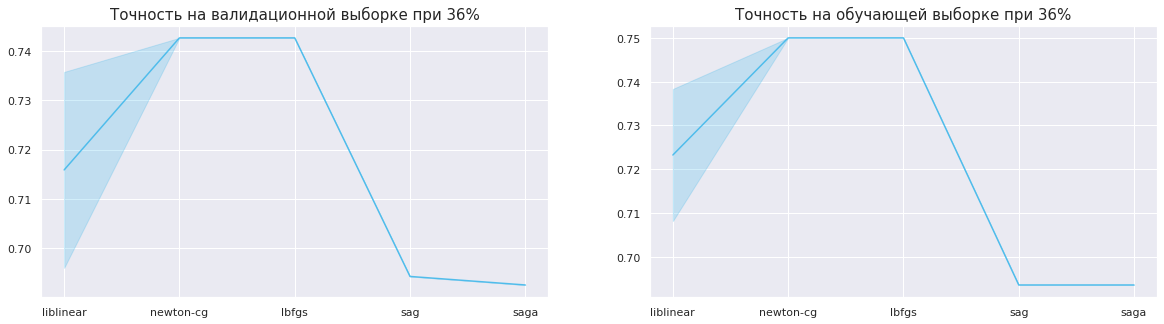

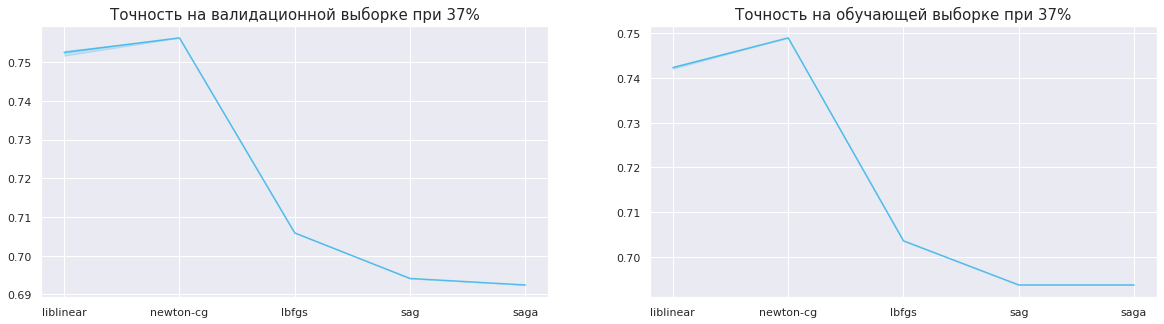

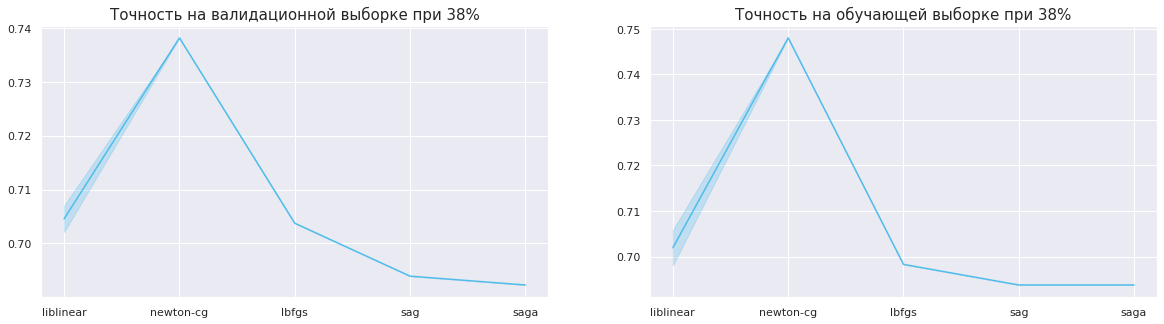

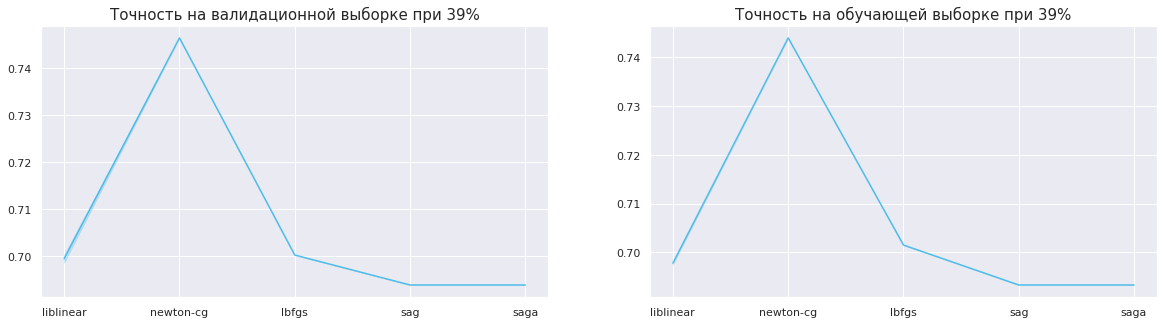

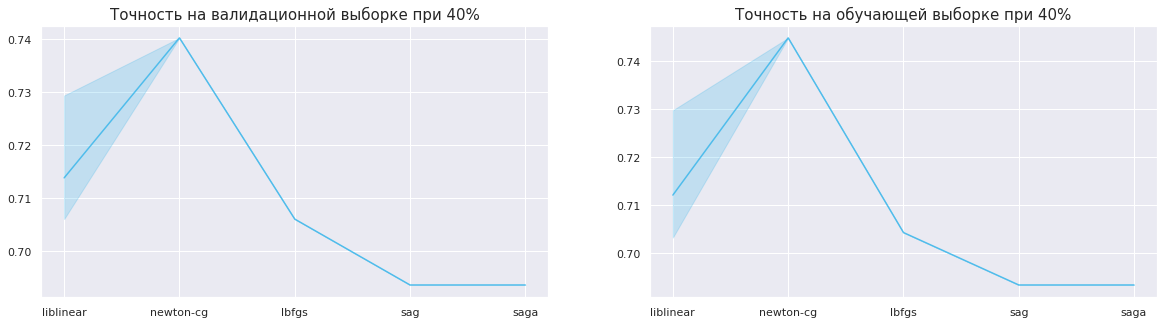

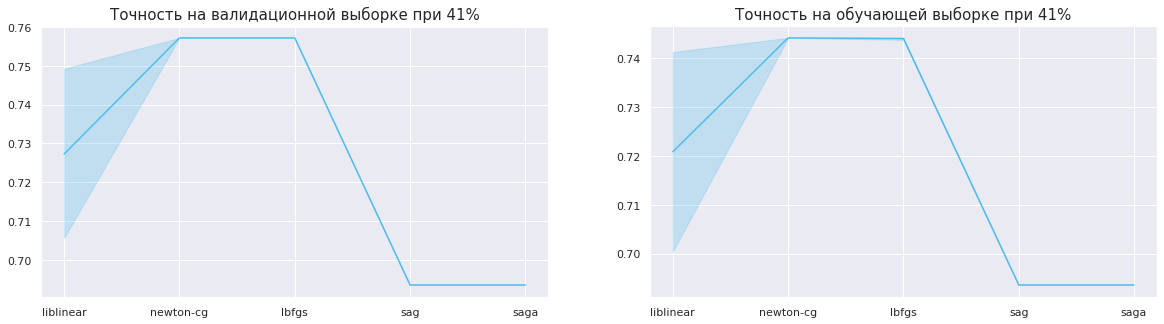

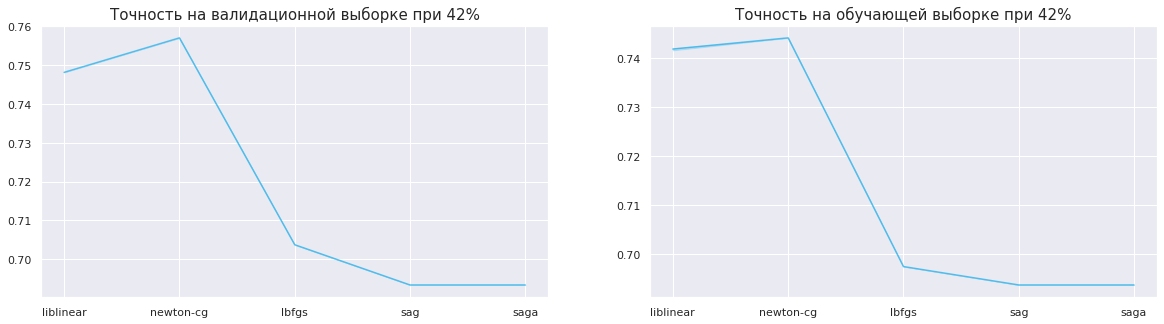

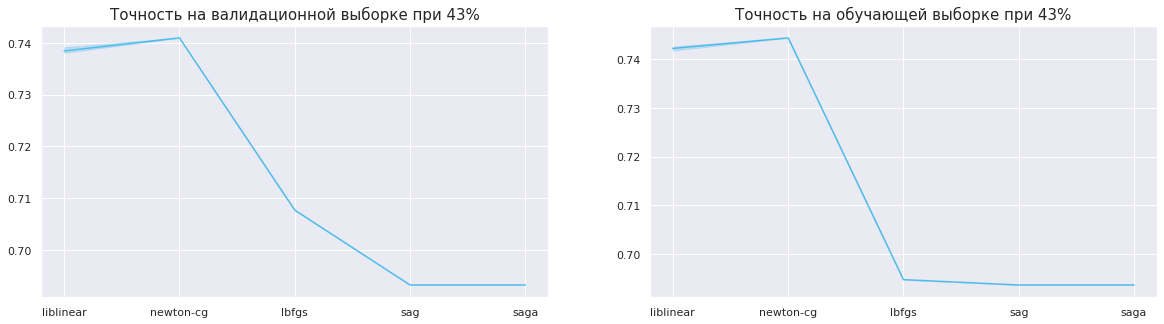

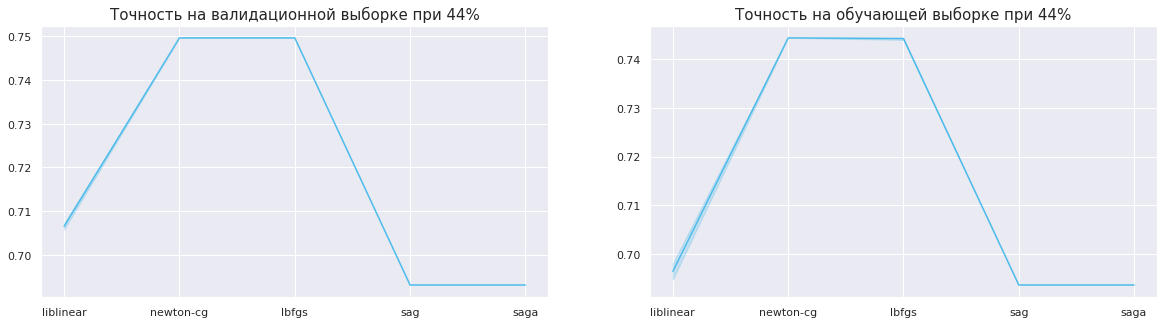

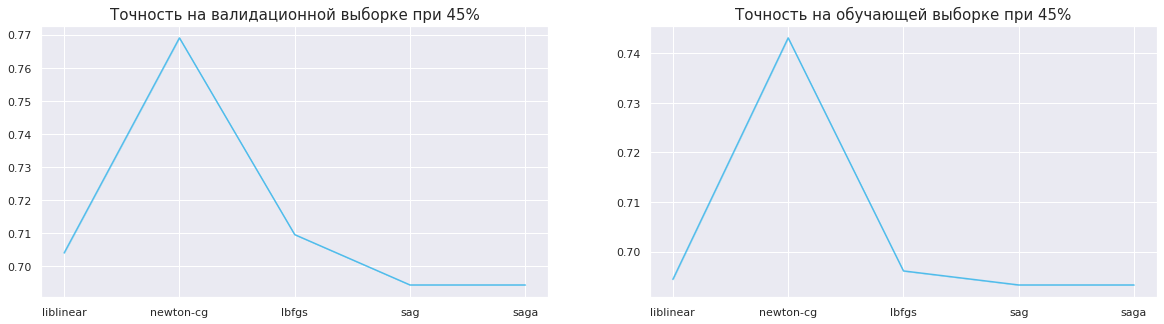

In [38]:
best_of_the_best_model_logistic_regression = None
best_of_the_best_result_logistic_regression = 0
best_of_the_best_solver_logistic_regressiont = 0
best_of_the_best_с_logistic_regression = 0
best_test_size = 0
    
for test_size in range(35, 46):
    print(f'test_size={test_size}%')
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=test_size/100, random_state=345, stratify=target)
    features_valid, features_test, target_valid, target_test = train_test_split(
        features_valid, target_valid, test_size=0.5, random_state=345, stratify=target_valid)

    best_model_logistic_regression = None
    best_result_logistic_regression = 0
    best_solver_logistic_regression = 0
    best_c_logistic_regression = 0

    list_solvers_logistic_regression = []
    list_accuracy_valid_logistic_regression = []
    list_accuracy_train_logistic_regression = []

    for c in range(1, 5):
        for solver in tqdm(['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']):
            model = LogisticRegression(
                C=c,
                random_state=345,
                solver=solver) 
            model.fit(features_train, target_train)
            predictions_valid = model.predict(features_valid)
            predictions_train = model.predict(features_train)
            result_valid = accuracy_score(target_valid, predictions_valid)
            result_train = accuracy_score(target_train, predictions_train)

            list_solvers_logistic_regression.append(solver)
            list_accuracy_valid_logistic_regression.append(result_valid)
            list_accuracy_train_logistic_regression.append(result_train)
            if result_valid > best_result_logistic_regression:
                best_model_logistic_regression = model
                best_result_logistic_regression = result_valid
                best_solver_logistic_regression = solver
                best_c_logistic_regression = c

    make_charts(
        list_solvers_logistic_regression,
        list_accuracy_valid_logistic_regression,
        list_accuracy_train_logistic_regression,
        test_size
    )

    print(f"""
    Accuracy лучшей модели "логистическая регрессия" на валидационной выборке: {best_result_logistic_regression},
    solver: {best_solver_logistic_regression},
    C: {best_c_logistic_regression}
    """)
    
    print('-'*25)
    if best_result_logistic_regression > best_of_the_best_result_logistic_regression:
        best_of_the_best_model_logistic_regression = best_model_logistic_regression
        best_of_the_best_result_logistic_regression = best_result_logistic_regression
        best_of_the_best_solver_logistic_regressiont = best_solver_logistic_regression
        best_of_the_best_с_logistic_regression = best_c_logistic_regression
        best_test_size = test_size
print(f"""
Accuracy наилучшей модели "логистическая регрессия" на валидационной выборке: {best_of_the_best_result_logistic_regression},
solver: {best_of_the_best_solver_logistic_regressiont},
C: {best_of_the_best_с_logistic_regression}
при выделении на валидационную и тестувую выборки {best_test_size}%
""")

In [39]:
print(best_of_the_best_model_logistic_regression)

LogisticRegression(C=1, random_state=345, solver='newton-cg')


Наилучший результат получили при выделении 45% датасета на валидационную и тестовую выборки, достигнув точности модели в 0.77.

**Попробовав три классификатора с различными гиперпараметрами, мы видим, что используя модель "случайный лес" мы получаем наилучший результат, равный 0.848.**

## Проверьте модель на тестовой выборке

Вот мы и вернулись к разделению датасета на выборки, чтобы проверить нашу самую лучшую модель на тестовой выборке.

In [40]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=.36, random_state=345)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=345)

In [41]:
predictions_test = best_of_the_best_model_forest.predict(features_test)
result = accuracy_score(target_test, predictions_test)

print(f"""
Accuracy наилучшей модели на тестовой выборке: {result},
""")


Accuracy наилучшей модели на тестовой выборке: 0.846286701208981,



С помощью "танца с бубнами" и какой-то матери мы получили точность модели на тестовой выборке равную 0.846, хотя, по настойчивому требованию внутреннего перфекциониста, упорно пытались выйти за 0.85. Сегодня ему не повезло.

## (бонус) Проверьте модели на адекватность

Какие модели нужно было проверить на вменяемость/адекватность? Мы же нашли лучшую модель, может быть её надо проверить?

Так как вы не услышали мой мысленный вопрос в 3:30 утра, буду проверять адекватность наилучшей модели "случайного леса".

Яндекс ремендует воспользоваться стратегий "самый встречаемый" из `DummyClassifier`, попробуем:

In [42]:
most_frequent = DummyClassifier(strategy="most_frequent", random_state=345)
most_frequent.fit(features_train, target_train)
most_frequent.score(features_test, target_test)

0.6994818652849741

Если я правильно интерпретировал происходящее, то мы получаем долю 0 в нашей тестовой выборке. Проверим себя:

In [43]:
(len(target_test)-sum(target_test))/len(target_test)

0.6994818652849741

**Совпало.**

А что у нас с нашими предсказаниями?

In [44]:
(len(predictions_test)-sum(predictions_test))/len(predictions_test)

0.8082901554404145

Значения 0.699 меньше получившихся 0.846, что говорит о том, что наша модель работает лучше, чем если бы всем абонентам преложили тариф "Смарт".

## Выводы



В процессе выполнения проекта был изучен датасет:
* рассмотрены все признаки;
* в двух случаях были проведены замены типа данных на `int`;

Рассмотрены три алгоритма машинного обучения классификации:
* дерево решений;
* случайный лес;
* логистическая регрессия.

В целях поиска наилучшей модели были проведены модификации гиперпараметров моделей и пропорций деления датасета на выборки.

После ознакомления с результатами лучшей моделью была признана **модель "случайного леса"**, которая позволила приблизиться к точности 0.85.

При проверке на тестовой выборке модель показала чуть более худший результат - **0.846**.

Чтобы убедиться, что полученные результаты релевантны модель была проверена на адекватность.

Проведенные расчеты показали, что модель адекватна и вменяема.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
